In [2]:
import soti_slab as slab
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

# Butterfly with different parameters

In [186]:
M=2.3
t=-1
D2=0.5
D2_diff=0.8
Dsurf=-(M+3*t)*D2/np.sqrt(t**2+D2**2)
Dsurf_diff=-(M+3*t)*D2_diff/np.sqrt(t**2+D2_diff**2)

In [200]:
smoov=np.linspace(-0.5,0.5,100)
phi_fit=(smoov+Dsurf)/2
phi_fit_diff=(smoov+Dsurf_diff)/(2)

In [141]:
phi,eps=slab.get_phis_eps(qmax=10,t=-1,D2=0.5)
phi_diff,eps_diff=slab.get_phis_eps(qmax=10,t=-1,D2=0.8)

(-2, 2)

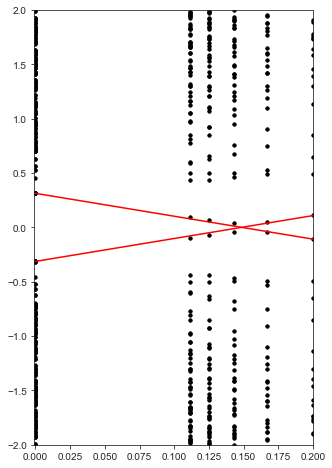

In [323]:
plt.figure(figsize=(5,8))
plt.scatter(phi,eps,c='k',marker='.')
plt.plot(Phi_space,E_0_p(Phi_space,-1,2.3,0.8,0.5),c='r')
plt.plot(Phi_space,E_0_m(Phi_space,-1,2.3,0.8,0.5),c='r')
plt.xlim(-0.001,0.2)
plt.ylim(-2,2)

(-2, 2)

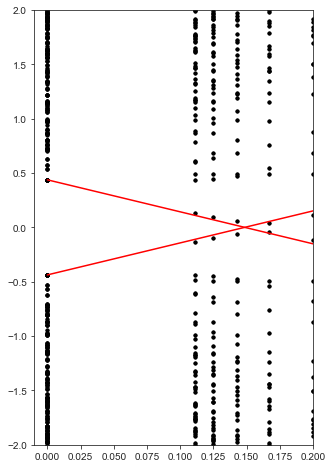

In [327]:
plt.figure(figsize=(5,8))
plt.scatter(phi_diff,eps_diff,c='k',marker='.')
plt.plot(Phi_space,E_0_p(Phi_space,-1,2.3,0.8,0.8),c='r')
plt.plot(Phi_space,E_0_m(Phi_space,-1,2.3,0.8,0.8),c='r')
plt.xlim(-0.01,0.2)
plt.ylim(-2,2)

# Spectra with indexing

In [3]:
# hamiltonian
H = slab.soti_block_slab(50,p=1,q=50,nu=0,zu=0)

from scipy.sparse import linalg as ssl

E,waves=ssl.eigsh(H,k=int(4*50**2/8),sigma=0,return_eigenvectors=True)

In [290]:
def spectrum(p,q):
    kzs = np.linspace(-np.pi,np.pi,100)
    num=int(4*q**2/8)
    Es_surf = []
    Es_bulk = []
    ks_surf = []
    ks_bulk = []
    
    for i in range(100):
        kz=kzs[i]
        H=slab.soti_block_slab(size=q,p=p,q=q,nu=0,zu=kz)
        E,waves=ssl.eigsh(H,k=num,sigma=0,return_eigenvectors=True)
        idx,idx0=slab.get_indices(waves)
        Es_surf.extend(E[idx])
        Es_bulk.extend(E[idx0])
        ks_surf.extend([kz]*len(idx))
        ks_bulk.extend([kz]*len(idx0))
        
    return Es_surf, ks_surf, Es_bulk, ks_bulk 

## $\Phi = 1/10$

In [291]:
Es_surf0,ks_surf0,Es_bulk0,ks_bulk0=spectrum(p=1,q=10)

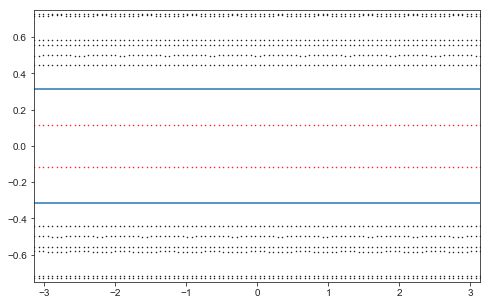

In [328]:
plt.figure(figsize=(8,5))
plt.scatter(ks_bulk0,Es_bulk0,c='k',alpha=1,marker='.',s=1)
plt.scatter(ks_surf0,Es_surf0,c='r',marker='.',s=1)
plt.axhline(y=Dsurf)
plt.axhline(y=-Dsurf)
plt.ylim(-0.75,0.75)
plt.xlim(-np.pi,np.pi)
plt.show()

## $\Phi = 1/50$

In [218]:
data_bulk=np.loadtxt("soti_slab_spectra_data_bulk.csv",delimiter=',')
data_surf=np.loadtxt("soti_slab_spectra_data_surf.csv",delimiter=',')

In [221]:
ks_bulk=data_bulk[0::2]
Es_bulk=data_bulk[1::2]
ks_surf=data_surf[0::2]
Es_surf=data_surf[1::2]

In [228]:
Dsurf=-(M+3*t)*D2/np.sqrt(t**2+D2**2)

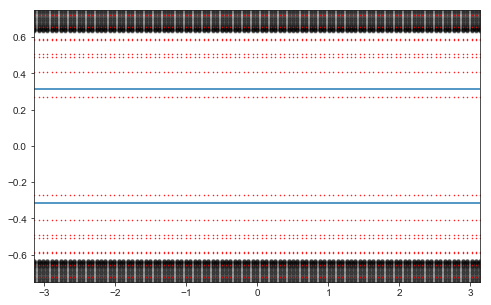

In [285]:
plt.figure(figsize=(8,5))
plt.scatter(ks_bulk,Es_bulk,c='k',alpha=0.1,marker='.',s=50)
plt.scatter(ks_surf,Es_surf,c='r',marker='.',s=1)
plt.axhline(y=Dsurf)
plt.axhline(y=-Dsurf)
plt.ylim(-0.75,0.75)
plt.xlim(-np.pi,np.pi)
plt.show()

### Is the LLL still missing?

In [12]:
# hamiltonian
H_ = slab.soti_block_slab(50,p=1,q=50,nu=0,zu=0)

from scipy.sparse import linalg as ssl

E,waves=ssl.eigsh(H_,k=4,sigma=0,return_eigenvectors=True)

In [ ]:
# jank to test
dim=int(np.sqrt(waves.shape[0]))
pos=np.arange(0,waves.shape[0])

In [350]:
wave_miss=waves[:,2]
wave_map=np.reshape(wave_miss,(dim,dim))

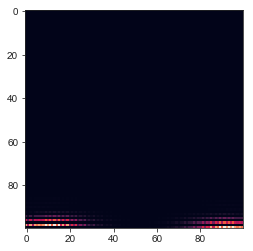

In [351]:
plt.imshow(np.abs(wave_map))

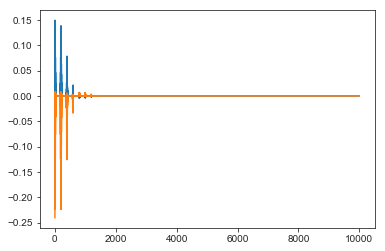

In [338]:
plt.plot(pos,np.real(wave_miss))
plt.plot(pos,np.imag(wave_miss))

# Butterfly inspect

In [47]:
import pandas as pd
with open('soti_inspect_data_surf.csv') as f:  
    num_cols = max(len(line.split(',')) for line in f)
    f.seek(0)
    dfsurf = pd.read_csv(f, names=range(num_cols)) 
with open('soti_inspect_data_bulk.csv') as f:  
    num_cols = max(len(line.split(',')) for line in f)
    f.seek(0)
    dfbulk = pd.read_csv(f, names=range(num_cols))

In [48]:
but_bulk=dfbulk.values
but_surf=dfsurf.values

In [49]:
phis_but_surf=but_surf[0::2]
eps_but_surf=but_surf[1::2]
phis_but_bulk=but_bulk[0::2]
eps_but_bulk=but_bulk[1::2]

In [11]:
# fit
def E_0_p(Phi,t,M,D1,D2):
    return -D2/np.sqrt(t**2+D2**2)*(M+3*t-3*t/4*2*np.pi*Phi)
def E_0_m(Phi,t,M,D1,D2):
    return +D2/np.sqrt(t**2+D2**2)*(M+3*t-3*t/4*2*np.pi*Phi)

In [12]:
Phi_space=np.linspace(0,1,1000)

Do this again but with more resolution and better labelling!

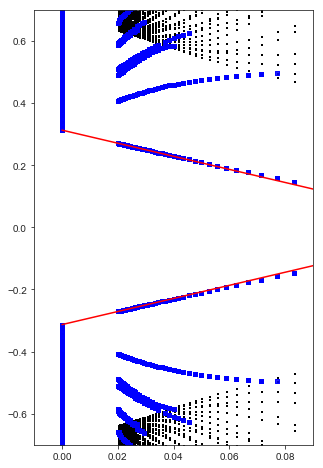

In [118]:
plt.figure(figsize=(5,8))
plt.scatter(phis_but_bulk,eps_but_bulk,marker='s',s=1,alpha=0.1,c='k')
plt.scatter(phis_but_surf,eps_but_surf,marker='s',s=10,alpha=0.1,c='b')
plt.plot(Phi_space,E_0_p(Phi_space,-1,2.3,0.8,0.5),c='r')
plt.plot(Phi_space,E_0_m(Phi_space,-1,2.3,0.8,0.5),c='r')
plt.ylim(-0.7,0.7)
plt.xlim(-0.01,0.09)
plt.show()

## Fine sorting (expectation values)

In [3]:
positions=np.loadtxt("data/soti_slab_average_positions.csv",delimiter=',')
data=np.loadtxt("data/soti_slab_inspect_data.csv",delimiter=',')

In [4]:
# only k=0 data for now
phis=data[0::2]
Es=data[1::2]
xs=positions[0::2]
ys=positions[1::2]

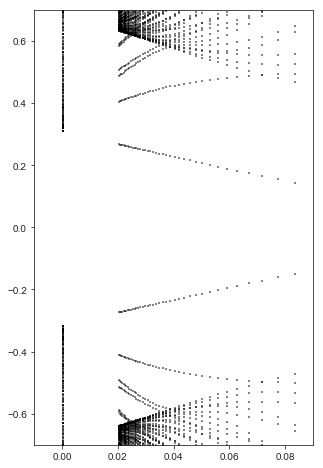

In [5]:
plt.figure(figsize=(5,8))
plt.scatter(phis,Es,marker='s',s=1,alpha=0.1,c='k')
plt.ylim(-0.7,0.7)
plt.xlim(-0.01,0.09)
plt.show()

In [6]:
# begin the finely sorted plot
# we have to run this for every phi
# since each will have a different system size
# and thus different definitions of surface/bulk modes

# start sorting phis
# only take non-zero ones
nonzero=phis[2]!=0
Phi=phis[2][nonzero]

# sort rest of arrays accordingly
Ens=Es[2][nonzero]
Xs=xs[2][nonzero]
Ys=ys[2][nonzero]

# initialize arrays
Phi_front=[]
Phi_back=[]
Ens_front=[]
Ens_back=[]
Cs_front=[]
Cs_back=[]
Ss_front=[]
Ss_back=[]

unique_phis,unique_index,unique_counts=np.unique(Phi,return_index=True,return_counts=True)

for i in range(len(unique_phis)):
    phi=unique_phis[i]
    count=unique_counts[i]
    index=unique_index[i]
    
    # fix arrays to only consider current phis
    Phi_fix=Phi[index:index+count]
    Ens_fix=Ens[index:index+count]
    
    # all phi are 1/something
    size=int(1/phi-1)
    center=float(size)/2
    
    # adjust positions
    Xs_fix=Xs[index:index+count]-center
    Ys_fix=Ys[index:index+count]-center
    
    # is_front
    is_front=Ys_fix < 0
    is_back=np.logical_not(is_front)
    
    # set c's and s's
    c_front=(Xs_fix[is_front])/center
    s_front=(2 + 16 * (Ys_fix[is_front]/center)**2)
    c_back=(Xs_fix[is_back])/center
    s_back=(2 + 16 * (Ys_fix[is_back]/center)**2)
    
    # add everything to arrays
    Phi_front.extend(Phi_fix[is_front].flatten())
    Phi_back.extend(Phi_fix[is_back].flatten())
    Ens_front.extend(Ens_fix[is_front].flatten())
    Ens_back.extend(Ens_fix[is_back].flatten())
    
    # the c's and s's too
    Cs_front.extend(c_front.flatten())
    Cs_back.extend(c_back.flatten())
    Ss_front.extend(s_front.flatten())
    Ss_back.extend(s_back.flatten())

/Users/leogoutte/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide
/Users/leogoutte/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


### Phi=0 case treated separately

In [242]:
# take care of the 0 phi values
# note the data arrays used are the original ones

# start sorting phis
# only take zero ones
zero=phis==0

In [8]:
# initialize arrays
Phi_front_0=[]
Phi_back_0=[]
Ens_front_0=[]
Ens_back_0=[]
Cs_front_0=[]
Cs_back_0=[]
Ss_front_0=[]
Ss_back_0=[]

def phi_0_energies(size,start,stop):
    # fix arrays to only consider current phis
    Phi_fix_0=phis[:,start:stop]
    Ens_fix_0=Es[:,start:stop]

    # use constant length
    size_0=int(size)
    center_0=float(size_0)/2

    # adjust positions
    Xs_fix_0=xs[:,start:stop]-center_0
    Ys_fix_0=ys[:,start:stop]-center_0
    
    # is_front
    is_front_0=Ys_fix_0 < 0
    is_back_0=np.logical_not(is_front_0)
    
    # set c's and s's
    c_front_0=(Xs_fix_0[is_front_0])/center_0
    s_front_0=(2 + 16 * (Ys_fix_0[is_front_0]/center_0)**2)
    c_back_0=(Xs_fix_0[is_back_0])/center_0
    s_back_0=(2 + 16 * (Ys_fix_0[is_back_0]/center_0)**2)
    
    # add everything to arrays
    Phi_front_0.extend(Phi_fix_0[is_front_0])
    Phi_back_0.extend(Phi_fix_0[is_back_0])
    Ens_front_0.extend(Ens_fix_0[is_front_0])
    Ens_back_0.extend(Ens_fix_0[is_back_0])
    
    # the c's and s's too
    Cs_front_0.extend(c_front_0)
    Cs_back_0.extend(c_back_0)
    Ss_front_0.extend(s_front_0)
    Ss_back_0.extend(s_back_0)

In [9]:
# initialize arrays
Phi_front_0=[]
Phi_back_0=[]
Ens_front_0=[]
Ens_back_0=[]
Cs_front_0=[]
Cs_back_0=[]
Ss_front_0=[]
Ss_back_0=[]

phi_0_energies(49,48840,49840)
phi_0_energies(48,48840-2*980,48840-980)
phi_0_energies(47,48840-2*980-2*960,48840-2*980-960)
phi_0_energies(46,48840-2*980-2*960-2*940,48840-2*980-2*960-940)
phi_0_energies(45,48840-2*980-2*960-2*940-2*920,48840-2*980-2*960-2*940-920)
phi_0_energies(44,48840-2*980-2*960-2*940-2*920-2*900,48840-2*980-2*960-2*940-2*920-900)
phi_0_energies(43,48840-2*980-2*960-2*940-2*920-2*900-2*880,48840-2*980-2*960-2*940-2*920-2*900-880)
phi_0_energies(42,48840-2*980-2*960-2*940-2*920-2*900-2*880-2*860,48840-2*980-2*960-2*940-2*920-2*900-2*880-860)
phi_0_energies(41,48840-2*980-2*960-2*940-2*920-2*900-2*880-2*860-2*840,48840-2*980-2*960-2*940-2*920-2*900-2*880-2*860-840)

### Mostly squares (size=L)

<function matplotlib.pyplot.show(*args, **kw)>

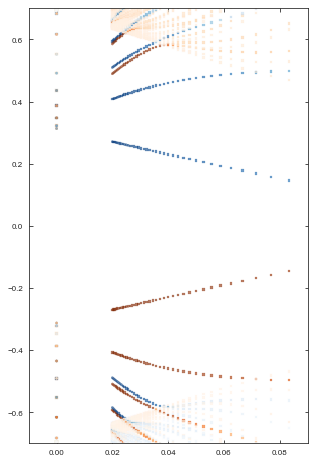

In [256]:
fig, ax = plt.subplots(figsize=(5,8))

ax.tick_params(direction='in', top=True, right=True)

ax.scatter(Phi_front, Ens_front,
        c=np.asarray(Cs_front),
        s=3*np.asarray(Ss_front),
        marker='s',
        alpha=0.6,
        cmap=newcmp,
        vmin=-1, vmax=1)

ax.scatter(Phi_back, Ens_back,
        c=np.asarray(Cs_back),
        s=3*np.asarray(Ss_back),
        marker='o',
        alpha=0.6,
        cmap=newcmp,
        vmin=-1, vmax=1)

ax.scatter(Phi_front_0, Ens_front_0,
        c=np.asarray(Cs_front_0),
        s=3*np.asarray(Ss_front_0),
        marker='s',
        alpha=0.6,
        cmap=newcmp,
        vmin=-1, vmax=1)

ax.scatter(Phi_back_0, Ens_back_0,
        c=np.asarray(Cs_back_0),
        s=3*np.asarray(Ss_back_0),
        marker='o',
        alpha=0.6,
        cmap=newcmp,
        vmin=-1, vmax=1)

# ax.scatter(phis[is_bot], Es[is_bot],
#         c=x_bars[is_bot]/14.5,
#         s=(2 + 16 * (y_bars[is_bot]/14.5)**2),
#         marker='o',
#         alpha=0.6,
#         cmap=newcmp,
#         facecolors='none',
#         vmin=-1, vmax=1)

plt.ylim(-0.7,0.7)
plt.xlim(-0.01,0.09)
plt.show

### Mostly circles (size=L-1)

In [89]:
%matplotlib notebook

In [48]:
import matplotlib
matplotlib.rc('text', usetex=False)
plt.style.use('seaborn-paper')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

top = matplotlib.cm.get_cmap('Oranges_r', 128)
bottom = matplotlib.cm.get_cmap('Blues', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = matplotlib.colors.ListedColormap(newcolors, name='OrangeBlue')

<IPython.core.display.Javascript object>


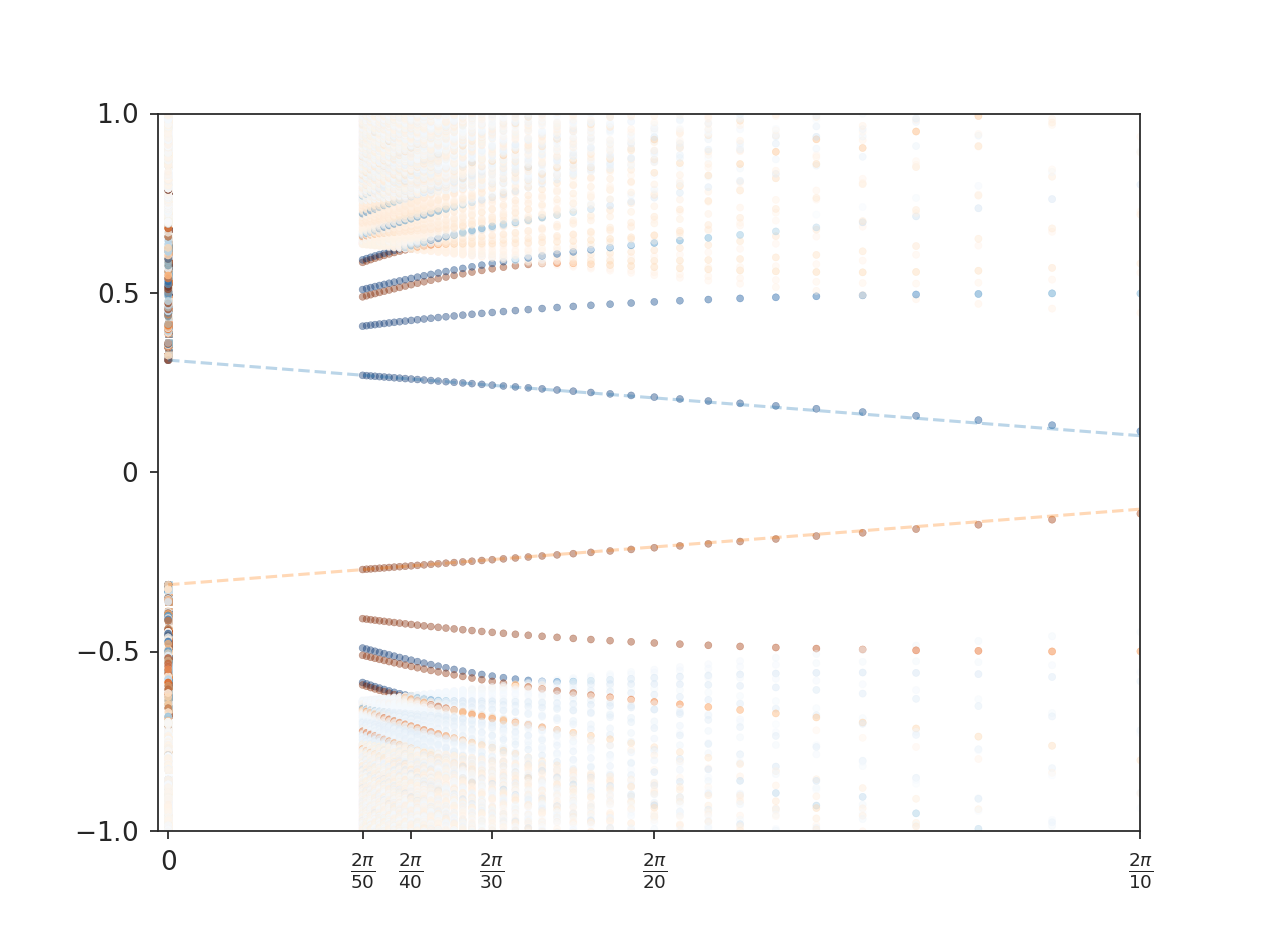

In [99]:
fig, ax = plt.subplots(figsize=(8,6))

plt.ylim((-1,1))
plt.xlim((-0.001,0.1))


ax.plot(Phi_space,E_0_p(Phi_space,-1,2.3,0.8,0.5),c='C0',ls='dashed',alpha=0.3)
ax.plot(Phi_space,E_0_m(Phi_space,-1,2.3,0.8,0.5),c='C1',ls='dashed',alpha=0.3)

ax.scatter(Phi_front, Ens_front,
        c=np.asarray(Cs_front),
        s=5*np.asarray(Ss_front),
        marker='s',
        alpha=0.4,
        cmap=newcmp,
        vmin=-1, vmax=1)

ax.scatter(Phi_back, Ens_back,
        c=np.asarray(Cs_back),
        s=5*np.asarray(Ss_back),
        marker='o',
        alpha=0.4,
        cmap=newcmp,
        vmin=-1, vmax=1)

ax.scatter(Phi_front_0, Ens_front_0,
        c=np.asarray(Cs_front_0),
        s=5*np.asarray(Ss_front_0),
        marker='s',
        alpha=0.6,
        cmap=newcmp,
        vmin=-1, vmax=1)

ax.scatter(Phi_back_0, Ens_back_0,
        c=np.asarray(Cs_back_0),
        s=5*np.asarray(Ss_back_0),
        marker='o',
        alpha=0.6,
        cmap=newcmp,
        vmin=-1, vmax=1)

# ax.scatter(phis[is_bot], Es[is_bot],
#         c=x_bars[is_bot]/14.5,
#         s=(2 + 16 * (y_bars[is_bot]/14.5)**2),
#         marker='o',
#         alpha=0.6,
#         cmap=newcmp,
#         facecolors='none',
#         vmin=-1, vmax=1)

# ax.set_xlabel(r"$B$", fontsize=16)
# ax.set_ylabel(r"$E/|t|$", fontsize=16)

ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_yticklabels([r"$-1.0$", r"$-0.5$", r"$0$", r"$0.5$", r"$1.0$"], fontsize=12)

ax.set_xticks([0,1/50,1/40,1/30,1/20,1/10])
ax.set_xticklabels([r"$0$",r"$\frac{2 \pi}{50}$",r"$\frac{2 \pi}{40}$",r"$\frac{2 \pi}{30}$",r"$\frac{2 \pi}{20}$",r"$\frac{2 \pi}{10}$"], fontsize=12)

# ax.tick_params(axis='both', labelsize=12)

# ax.tick_params(which='both',length=7, direction='in', top=True, right=True, bottom=True, left=True)

plt.show()


In [39]:
x_test=expectation_x(waves,50)

In [45]:
x_test

array([48.72558877,  0.27441123, 48.63117787,  0.36882213])

In [40]:
y_test=expectation_y(waves,50)

In [46]:
y_test

array([19.61460856, 19.61460856, 23.43620418, 23.43620418])

# Spectra

## $\Phi=0$

### $k_z$ spectrum

In [ ]:
ksz,esz=slab.kz_spectrum_slab(p=0,q=10,kz_res=100)

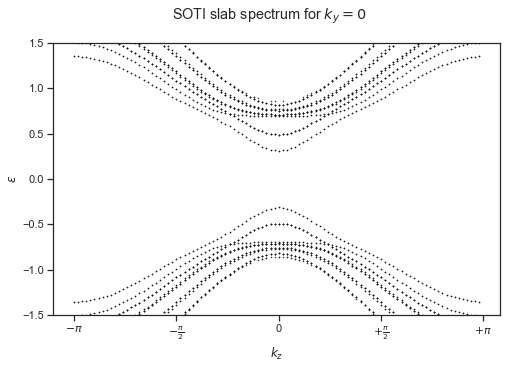

In [22]:
plt.figure(figsize=(8,5))
plt.suptitle(r"SOTI slab spectrum for $k_y = 0$")
plt.ylabel(r"$\epsilon$")
plt.xlabel(r"$k_z$")
plt.ylim(-1.5,1.5)
plt.xticks((-np.pi,-np.pi/2,0,np.pi/2,np.pi),[r"$-\pi$",r"$-\frac{\pi}{2}$",r"0",r"$+\frac{\pi}{2}$",r"$+\pi$"])
plt.scatter(ksz,esz,c='k',marker='.',s=1)
plt.show()

#### sum over $k_y$

In [54]:
data_kz0=np.loadtxt(open("soti_slab_kz_spectrum_data.csv"),delimiter=',')
kz0=data_kz0[0::2,:]
Ez0=data_kz0[1::2,:]

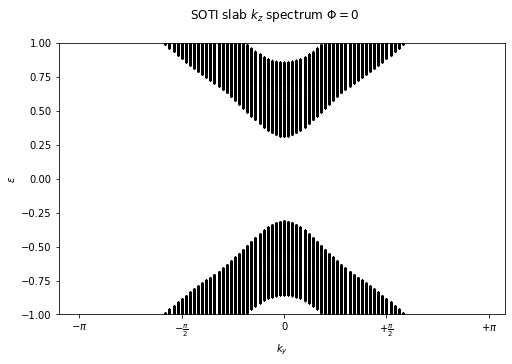

In [58]:
plt.figure(figsize=(8,5))
plt.suptitle(r"SOTI slab $k_z$ spectrum $\Phi=0$")
plt.ylabel(r"$\epsilon$")
plt.xlabel(r"$k_y$")
plt.xticks((-np.pi,-np.pi/2,0,np.pi/2,np.pi),[r"$-\pi$",r"$-\frac{\pi}{2}$",r"0",r"$+\frac{\pi}{2}$",r"$+\pi$"])
plt.scatter(kz0,Ez0,c='k',marker='.',s=1)
plt.ylim(-1,1)
plt.show()

### $k_y$ spectrum

In [ ]:
ksy,esy=slab.ky_spectrum_slab(p=0,q=10,ky_res=100)

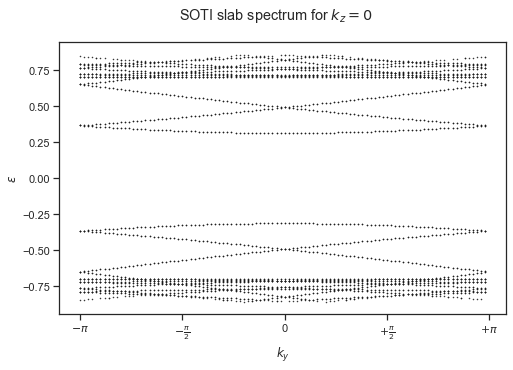

In [23]:
plt.figure(figsize=(8,5))
plt.suptitle(r"SOTI slab spectrum for $k_z = 0$")
plt.ylabel(r"$\epsilon$")
plt.xlabel(r"$k_y$")
plt.xticks((-np.pi,-np.pi/2,0,np.pi/2,np.pi),[r"$-\pi$",r"$-\frac{\pi}{2}$",r"0",r"$+\frac{\pi}{2}$",r"$+\pi$"])
plt.scatter(ksy,esy,c='k',marker='.',s=1)
plt.show()

#### sum over $k_z$

In [56]:
data_ky0=np.loadtxt(open("soti_slab_ky_spectrum_data.csv"),delimiter=',')
ky0=data_ky0[0::2,:]
Ey0=data_ky0[1::2,:]

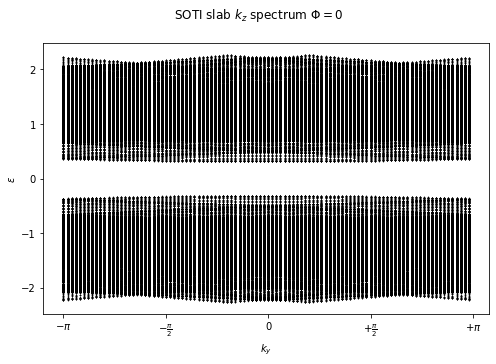

In [57]:
plt.figure(figsize=(8,5))
plt.suptitle(r"SOTI slab $k_z$ spectrum $\Phi=0$")
plt.ylabel(r"$\epsilon$")
plt.xlabel(r"$k_y$")
plt.xticks((-np.pi,-np.pi/2,0,np.pi/2,np.pi),[r"$-\pi$",r"$-\frac{\pi}{2}$",r"0",r"$+\frac{\pi}{2}$",r"$+\pi$"])
plt.scatter(ky0,Ey0,c='k',marker='.',s=1)
plt.show()

## Spectra for $\Phi=1/10$

In [45]:
data_ky=np.loadtxt(open("soti_slab_ky_spectrum_data.csv"),delimiter=',')

In [46]:
ky=data_ky[0::2,:]
Ey=data_ky[1::2,:]

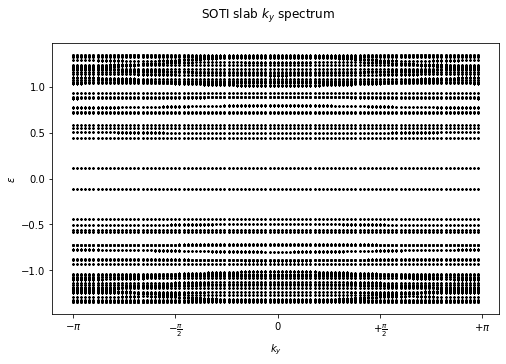

In [47]:
plt.figure(figsize=(8,5))
plt.suptitle(r"SOTI slab $k_y$ spectrum $\Phi=1/10$")
plt.ylabel(r"$\epsilon$")
plt.xlabel(r"$k_y$")
plt.xticks((-np.pi,-np.pi/2,0,np.pi/2,np.pi),[r"$-\pi$",r"$-\frac{\pi}{2}$",r"0",r"$+\frac{\pi}{2}$",r"$+\pi$"])
plt.scatter(ky,Ey,c='k',marker='.',s=1)
plt.show()

In [49]:
data_kz=np.loadtxt(open("soti_slab_kz_spectrum_data.csv"),delimiter=',')

In [50]:
kz=data_kz[0::2,:]
Ez=data_kz[1::2,:]

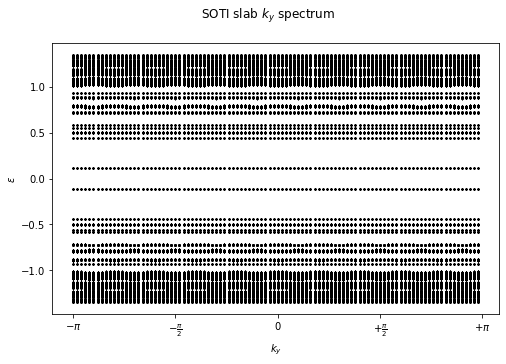

In [51]:
plt.figure(figsize=(8,5))
plt.suptitle(r"SOTI slab $k_z$ spectrum for $\Phi=1/10$")
plt.ylabel(r"$\epsilon$")
plt.xlabel(r"$k_y$")
plt.xticks((-np.pi,-np.pi/2,0,np.pi/2,np.pi),[r"$-\pi$",r"$-\frac{\pi}{2}$",r"0",r"$+\frac{\pi}{2}$",r"$+\pi$"])
plt.scatter(kz,Ez,c='k',marker='.',s=1)
plt.show()

# Butterfly

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
p,e=slab.get_phis_eps(qmax=30)

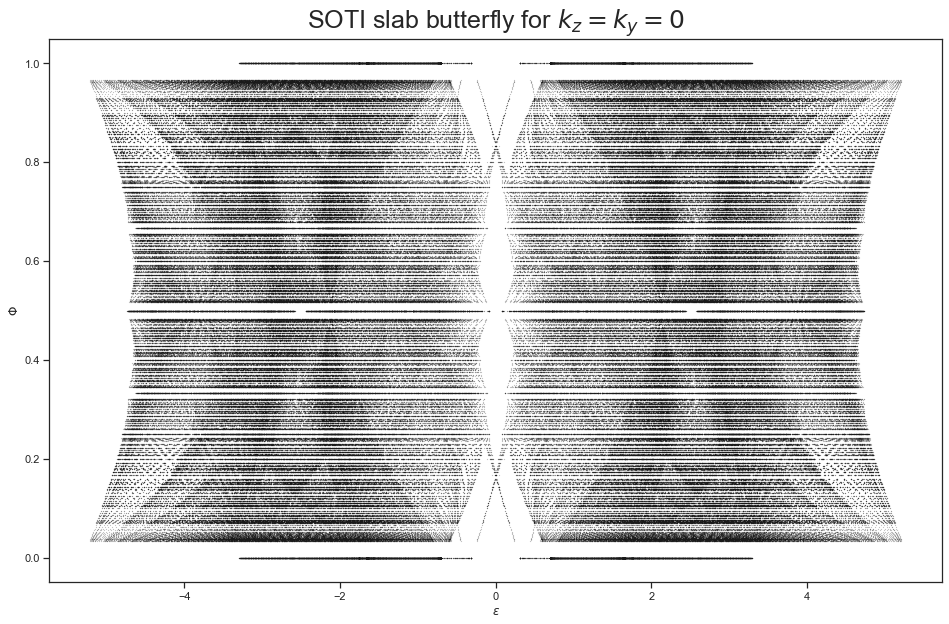

In [49]:
plt.figure(figsize=(16,10))
plt.title(r"SOTI slab butterfly for $k_z=k_y=0$",fontsize=25)
plt.ylabel(r"$\Phi$")
plt.xlabel(r"$\epsilon$")
#plt.xticks((-np.pi,-np.pi/2,0,np.pi/2,np.pi),[r"$-\pi$",r"$-\frac{\pi}{2}$",r"0",r"$+\frac{\pi}{2}$",r"$+\pi$"])
plt.scatter(e,p,c='k',marker='.',s=0.01)
plt.show()

In [ ]:
p1,e1=slab.get_phis_eps(qmax=30,nu=0,zu=-np.pi)

p2,e2=slab.get_phis_eps(qmax=30,nu=0,zu=-np.pi/2)

p3,e3=slab.get_phis_eps(qmax=30,nu=0,zu=np.pi/2)

p4,e4=slab.get_phis_eps(qmax=30,nu=0,zu=np.pi)

## Spectra for $\Phi=1/10$

In [45]:
data_ky=np.loadtxt(open("soti_slab_ky_spectrum_data.csv"),delimiter=',')

In [46]:
ky=data_ky[0::2,:]
Ey=data_ky[1::2,:]

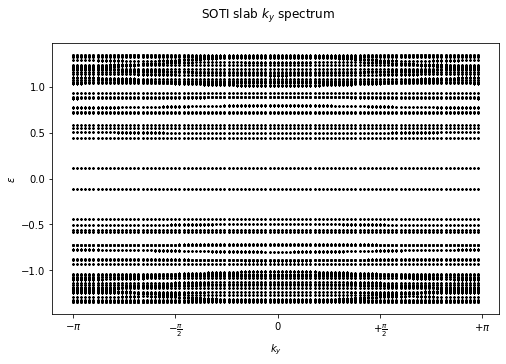

In [47]:
plt.figure(figsize=(8,5))
plt.suptitle(r"SOTI slab $k_y$ spectrum $\Phi=1/10$")
plt.ylabel(r"$\epsilon$")
plt.xlabel(r"$k_y$")
plt.xticks((-np.pi,-np.pi/2,0,np.pi/2,np.pi),[r"$-\pi$",r"$-\frac{\pi}{2}$",r"0",r"$+\frac{\pi}{2}$",r"$+\pi$"])
plt.scatter(ky,Ey,c='k',marker='.',s=1)
plt.show()

In [49]:
data_kz=np.loadtxt(open("soti_slab_kz_spectrum_data.csv"),delimiter=',')

In [50]:
kz=data_kz[0::2,:]
Ez=data_kz[1::2,:]

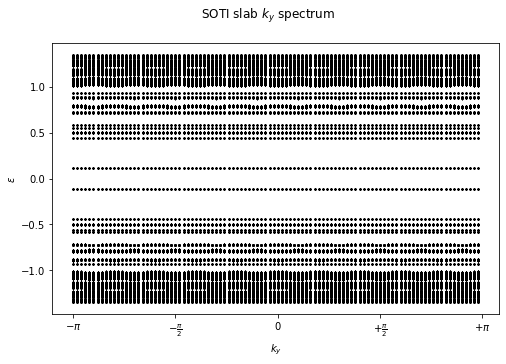

In [51]:
plt.figure(figsize=(8,5))
plt.suptitle(r"SOTI slab $k_z$ spectrum for $\Phi=1/10$")
plt.ylabel(r"$\epsilon$")
plt.xlabel(r"$k_y$")
plt.xticks((-np.pi,-np.pi/2,0,np.pi/2,np.pi),[r"$-\pi$",r"$-\frac{\pi}{2}$",r"0",r"$+\frac{\pi}{2}$",r"$+\pi$"])
plt.scatter(kz,Ez,c='k',marker='.',s=1)
plt.show()

## Evenly spaced

In [3]:
p_sp,e_sp=get_phis_eps_spaced(Phi=1/4,q=30,n=1)

(-0.5, 0.5)

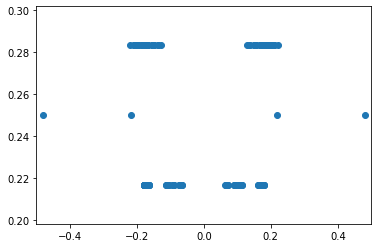

In [7]:
plt.scatter(e_sp,p_sp)
plt.xlim(-0.5,0.5)

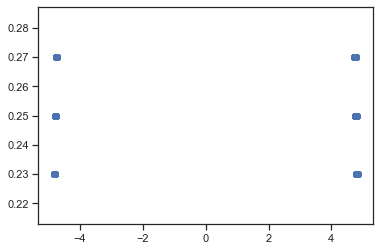

In [58]:
plt.scatter(e_sp,p_sp)